# Customer Churn Analysis

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing requried Libraries

In [55]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import os

In [13]:
os.chdir("C:\github_repo\Files")
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## DATA INSPECTION

In [14]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1422,3870-SPZSI,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.05,7869.05,No
1209,8268-YDIXR,Male,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,93.15,5253.95,No
4961,6954-OOYZZ,Male,0,Yes,No,18,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.35,768.05,No
5516,6923-EFPNL,Male,0,No,No,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),51.75,201.1,Yes
3610,2612-RANWT,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.15,1164.3,Yes


In [16]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [17]:
#checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
#shape of data
df.shape

(7043, 21)

In [19]:
#datatypes of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
#information of all columns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.nunique().to_frame("Unique Values")

,Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


OBSERVATION

We have 7043 rows and 21 columns out of which 1 is a target variable.

we have object and float datatypes. TotalCharges is a float type data but it is showing object type so we will change the data type.

info method verifies about the dataset there is no null values in the dataset.

We can see that our target variable 'Churn' has only 2 classes.

customerID column is not going to help predicting target so lets drop it.

In [22]:
#dropping column customerId
df=df.drop(["customerID"],axis=1)

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
#checking the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

OBSERVATION

we can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So we will replace them.

Lets go with "No" for "No internet Service".If "no internet service" then there is "no" in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So lets replace all these entries with 'No'.

In [25]:
#converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [26]:
#replacing negative data with no

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [27]:
#Checking null values in the dataset
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

OBSERVATION

There are 11 null values in the 'Total Charges' feature.Let's replace it with mean

In [28]:
#replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [29]:
#checking null values again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [31]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## STASTICAL SUMMARY

In [32]:
#dropping duplicate rows and columns
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.342338
std,0.368947,24.534965,30.069001,2265.044153
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


## EDA (EXPLANATORY DATA ANALYSIS)

## UNIVARIATE ANALYSIS

No     5164
Yes    1857
Name: Churn, dtype: int64


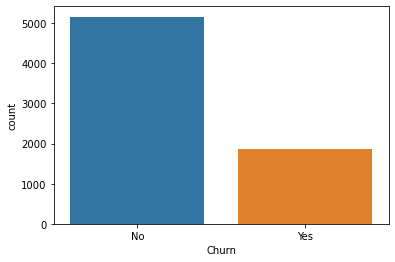

In [34]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"])
plt.show()


OBSERVATION

The count of "No Churn" are high compared to the count of "Yes Churn".

Male      3541
Female    3480
Name: gender, dtype: int64


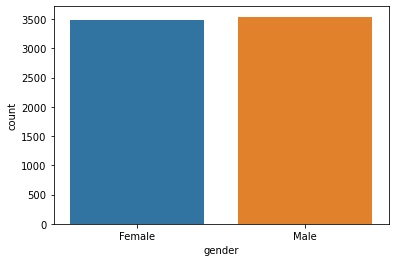

In [35]:
print(df["gender"].value_counts())
sns.countplot(df["gender"])
plt.show()

OBSERVATION The count of "Male " and "Female are almost same".

No     3619
Yes    3402
Name: Partner, dtype: int64


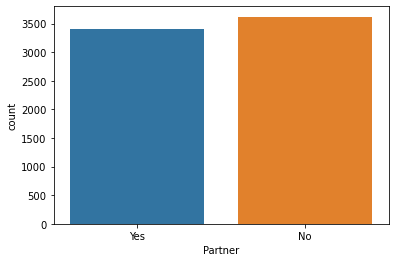

In [36]:
print(df["Partner"].value_counts())
sns.countplot(df["Partner"])
plt.show()

OBSERVATION

No count is a bit higher than yes count for partner column

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


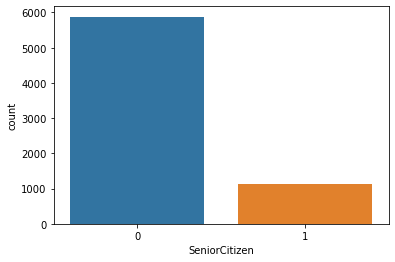

In [37]:
print(df["SeniorCitizen"].value_counts())
sns.countplot(df["SeniorCitizen"])
plt.show()

OBSERVATION

we see low number in senior citizen

Yes    6339
No      682
Name: PhoneService, dtype: int64


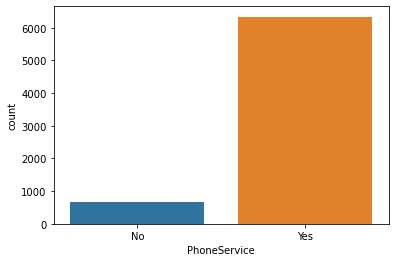

In [38]:
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"])
plt.show()

OBSERVATION

The customers who have phone services are large in numbers and who do not own phone services are very less in number.

No     4050
Yes    2971
Name: MultipleLines, dtype: int64


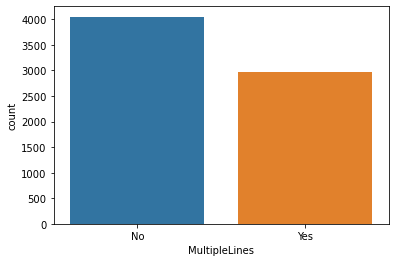

In [39]:
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"])
plt.show()

OBSERVATION

"No" in MultipleLines are more than "Yes"

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


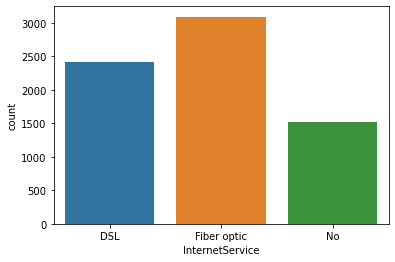

In [40]:
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"])
plt.show()


OBSERVATION

Most of the customers have Fiber optic internet followed by DSL, but there are some customers who do not have an internet service.

No     5002
Yes    2019
Name: OnlineSecurity, dtype: int64


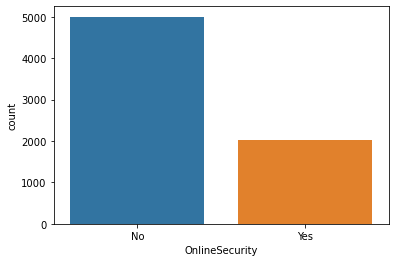

In [41]:
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"])
plt.show()

OBSERVATION

Many customers do not use any online security.

No     4592
Yes    2429
Name: OnlineBackup, dtype: int64


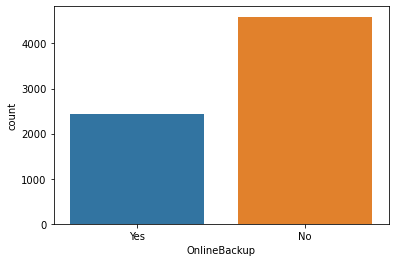

In [42]:
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"])
plt.show()

OBSERVATION

We have more counts of customers without online backup.

No     4599
Yes    2422
Name: DeviceProtection, dtype: int64


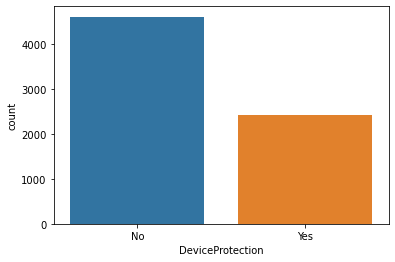

In [43]:
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"])
plt.show()

No     4977
Yes    2044
Name: TechSupport, dtype: int64


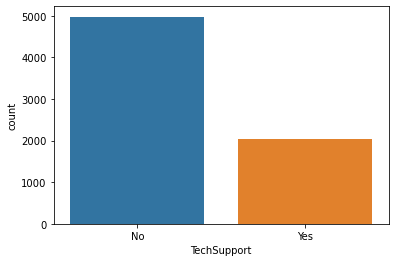

In [44]:
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"])
plt.show()

OBSERVATION

We have more customers with no tech support.

No     4314
Yes    2707
Name: StreamingTV, dtype: int64


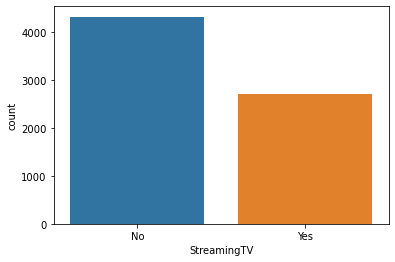

In [45]:
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"])
plt.show()

OBSERVATION

Most customers do not have tv streaming

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


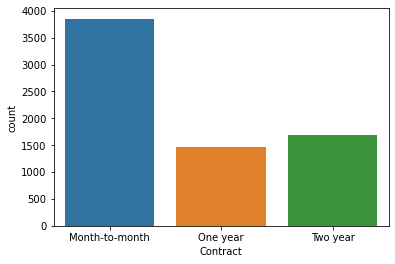

In [48]:
print(df["Contract"].value_counts())
sns.countplot(df["Contract"])
plt.show()

OBSERVATION

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


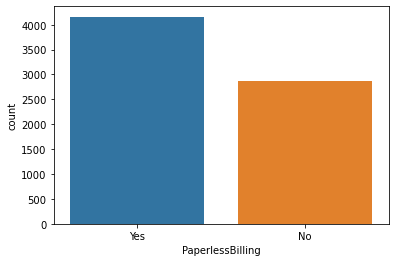

In [49]:
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"])
plt.show()

OBSERVATION

Most of the customers go for paperless billing.

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


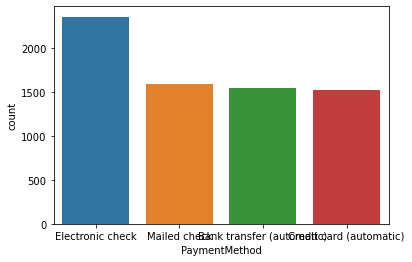

In [50]:
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"])
plt.show()

OBSERVATION

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card are average in count.


## BIVARIATE ANALYSIS

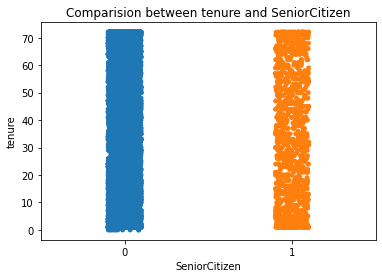

In [51]:
#Comparing tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

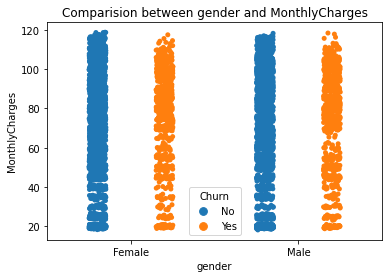

In [52]:
#Comparing gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

OBSERVATION

Most both male and female customers with monthly charges above 70 have high chances of getting churned.

## MULTIVARIATE ANALYSIS

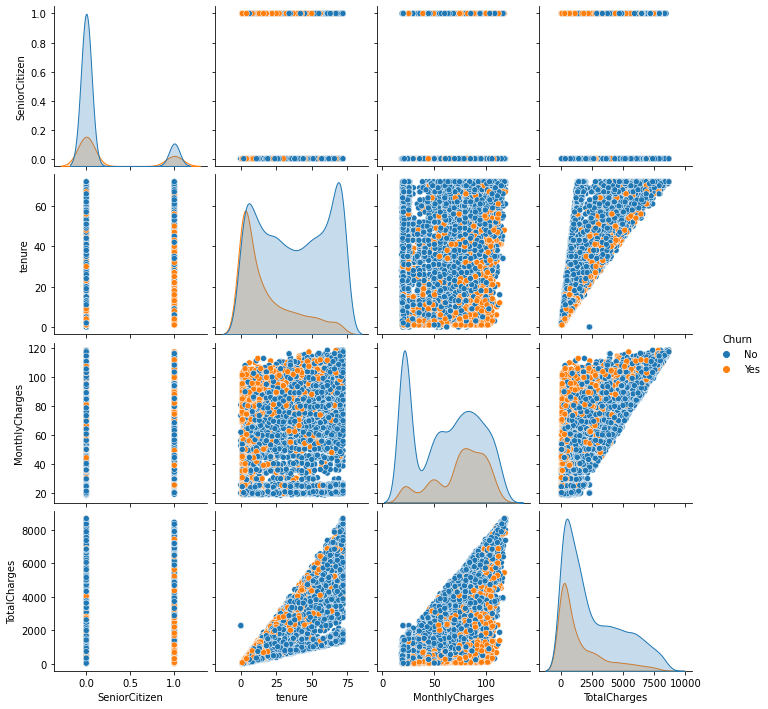

In [53]:
sns.pairplot(df,hue="Churn")
plt.show()

## ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER

In [56]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


## OUTLIERS

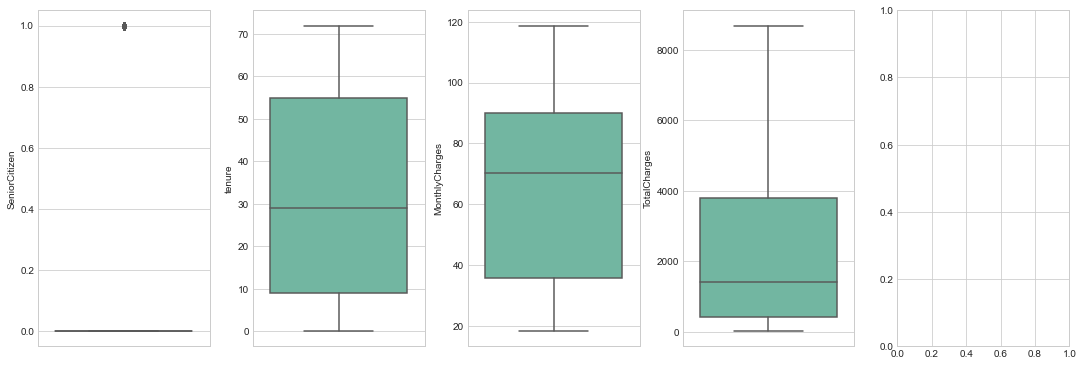

In [57]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[num_col].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

OBSERVATION

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

## SKEWNESS

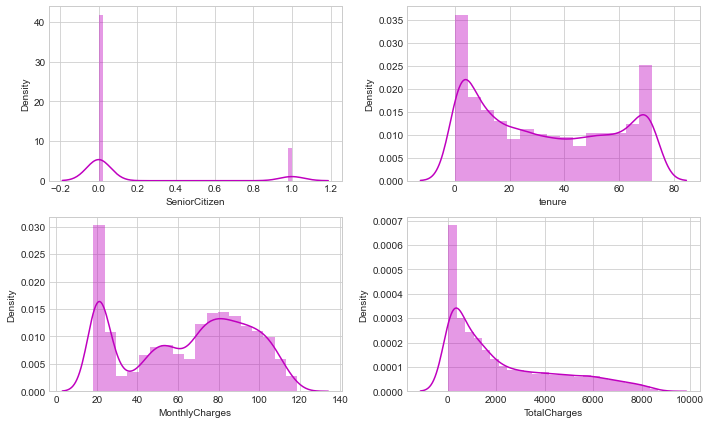

In [58]:
#Checking the distribution of the numerical columns
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()


In [59]:
df.skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.224097
PaymentMethod      -0.166267
gender             -0.017381
Partner             0.061857
InternetService     0.208589
tenure              0.235542
MultipleLines       0.311125
StreamingMovies     0.454949
StreamingTV         0.470354
Contract            0.626004
OnlineBackup        0.647791
DeviceProtection    0.652428
Dependents          0.870322
TechSupport         0.919773
OnlineSecurity      0.938871
TotalCharges        0.959088
Churn               1.068139
SeniorCitizen       1.829987
dtype: float64

By looking at the distribution of numerical column and comparing skewness we find column "TOTALCHARGES" is the only numerical column having skewness .lets remove it.

In [60]:
#removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [61]:
#checking skewness again
df.skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.224097
PaymentMethod      -0.166267
gender             -0.017381
TotalCharges        0.010538
Partner             0.061857
InternetService     0.208589
tenure              0.235542
MultipleLines       0.311125
StreamingMovies     0.454949
StreamingTV         0.470354
Contract            0.626004
OnlineBackup        0.647791
DeviceProtection    0.652428
Dependents          0.870322
TechSupport         0.919773
OnlineSecurity      0.938871
Churn               1.068139
SeniorCitizen       1.829987
dtype: float64

## CORRELATION

In [62]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.007730,-0.001762,-0.016534,-0.013206,-0.001511,-0.008703,-0.007760,-0.009856,0.000811,-0.011350,0.016304,-0.013158,-0.000490,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.031221,-0.039332,0.065950,0.058797,-0.061338,0.104765,0.119584,-0.143624,0.156196,-0.037320,0.219434,0.105061,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.003667,0.141482,0.139620,0.151941,0.118311,0.122572,0.115284,0.293042,-0.015776,-0.152069,0.094301,0.340864,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.046608,0.079776,0.022217,0.012498,0.062039,-0.018207,-0.041441,0.241912,-0.112220,-0.038185,-0.116191,0.082048,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,-0.026847,0.325704,0.358586,0.358968,0.322694,0.277575,0.283932,0.670728,0.005053,-0.367827,0.245251,0.867732,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,0.387549,-0.092316,-0.051619,-0.070554,-0.095761,-0.021788,-0.032179,0.003101,0.016824,-0.005304,0.248984,0.090071,0.011323
MultipleLines,-0.007730,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.013614,0.096583,0.200690,0.199591,0.099037,0.255579,0.257170,0.105130,0.163249,-0.168684,0.489539,0.468107,0.041958
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,0.013614,1.000000,-0.392445,-0.313719,-0.305763,-0.388791,-0.241122,-0.248948,0.102456,-0.137056,0.082669,-0.320525,-0.203324,-0.047366
OnlineSecurity,-0.016534,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,-0.392445,1.000000,0.282802,0.274398,0.354110,0.174919,0.186119,0.244301,-0.004202,-0.148360,0.295548,0.407868,-0.170520
OnlineBackup,-0.013206,0.065950,0.139620,0.022217,0.358586,-0.051619,0.200690,-0.313719,0.282802,1.000000,0.302398,0.293209,0.280816,0.273188,0.153493,0.126421,-0.168938,0.440965,0.490578,-0.081092


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

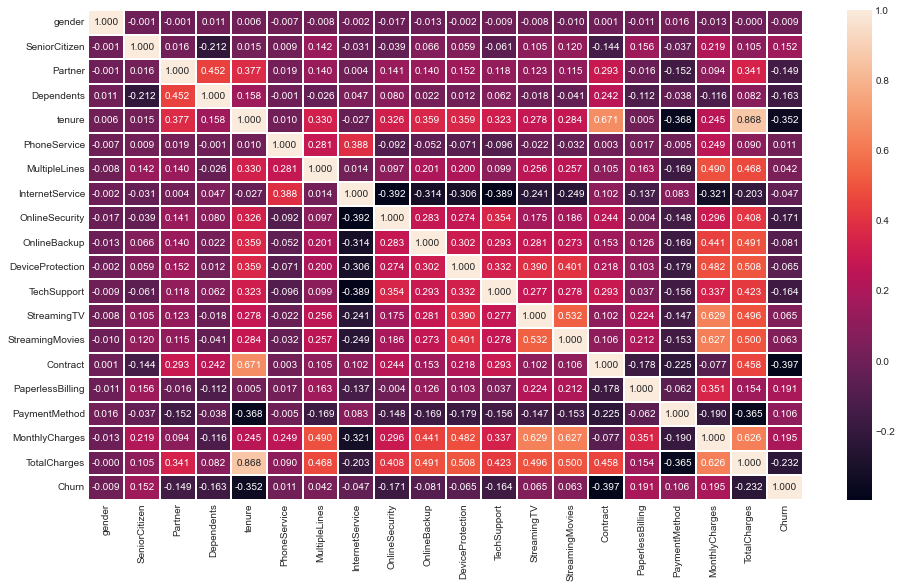

In [63]:
#visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [64]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
StreamingTV         0.065032
StreamingMovies     0.063192
MultipleLines       0.041958
PhoneService        0.011323
gender             -0.008763
InternetService    -0.047366
DeviceProtection   -0.064944
OnlineBackup       -0.081092
Partner            -0.149135
Dependents         -0.163459
TechSupport        -0.163937
OnlineSecurity     -0.170520
TotalCharges       -0.232394
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

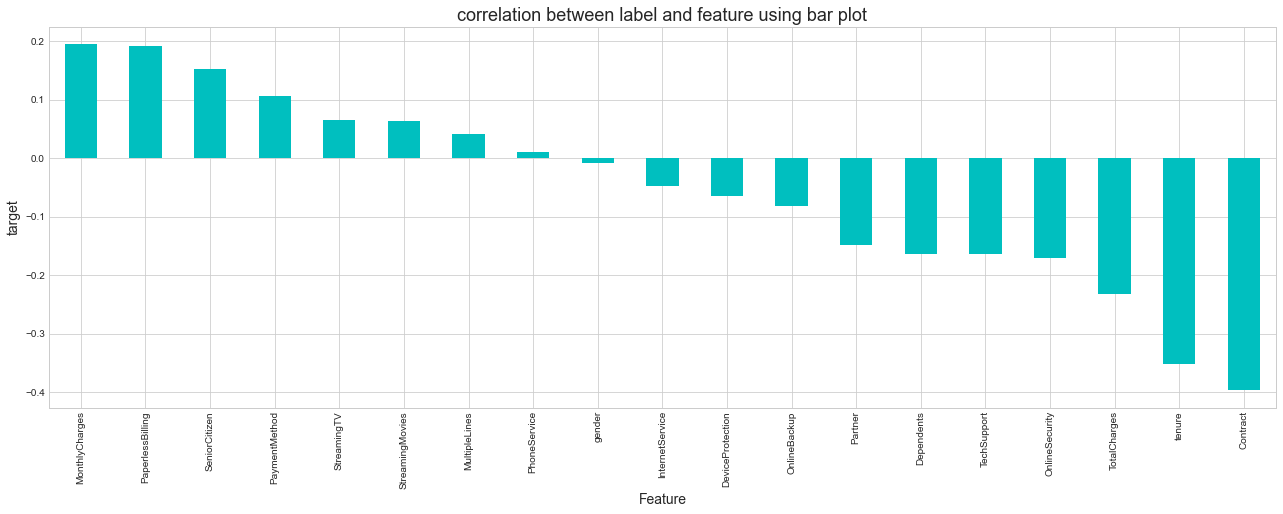

In [65]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

OBSERVATION

We see the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the target column.

## Splitting the dataset into Features and Target

In [66]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [67]:
x.shape

(7021, 19)

In [68]:
y.shape

(7021,)

## SMOTE

In [69]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [70]:
y.value_counts()

0.0    5164
1.0    5164
Name: Churn, dtype: int64

In [71]:
x.shape

(10328, 19)

In [72]:
y.shape

(10328,)

<AxesSubplot:xlabel='Churn', ylabel='count'>

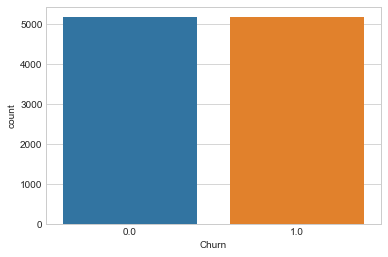

In [73]:
#visualize the data after balancing
sns.countplot(y)

## STANDARD SCALER

In [74]:
#scaling the independant variable (X) to get all the columns in a standard scale
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

## MultiCollinearity with Variance Inflation Factor

In [75]:
#importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [77]:
calc_vif(x)

,Features,VIF values
0,gender,1.003070
1,SeniorCitizen,1.099468
2,Partner,1.506629
3,Dependents,1.400377
4,tenure,13.162935
5,PhoneService,1.798262
6,MultipleLines,1.595723
7,InternetService,1.756491
8,OnlineSecurity,1.444261
9,OnlineBackup,1.453814


OBSERVATION

Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF

In [78]:
#dropping the feature Total Volume
x.drop("TotalCharges",axis=1, inplace=True)

In [79]:
calc_vif(x)

,Features,VIF values
0,gender,1.003069
1,SeniorCitizen,1.099395
2,Partner,1.502498
3,Dependents,1.398918
4,tenure,2.930360
5,PhoneService,1.797535
6,MultipleLines,1.577905
7,InternetService,1.753198
8,OnlineSecurity,1.431367
9,OnlineBackup,1.444193


All the columns have VIF less than 10 which means the data is free from multicollinearity problem.

Now the Dataset is ready for Machine Learning

## MACHINE LEARNING

### FINDING BEST RANDOM STATE

Since the y (Target) has Categorical values, we will use Logistic Regression

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

In [81]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8736689254598258  on Random_state  91


In [82]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [83]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=15)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [84]:
#Logistic Regression
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 78.1703775411423

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1073
         1.0       0.75      0.82      0.78       993

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

Cross Validation Score: 76.52988427884648

Accuracy Score - Cross Validation Score is 1.64049326229582


In [85]:
#GAUSSIAN NAIVE BAYES
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 76.81510164569217

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1073
         1.0       0.74      0.80      0.77       993

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 76.04587123707014

Accuracy Score - Cross Validation Score is 0.7692304086220219


In [86]:
#SVC CLASSIFIER(RBF)
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 84.12391093901257

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1073
         1.0       0.84      0.83      0.83       993

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

Cross Validation Score: 81.36219994421383

Accuracy Score - Cross Validation Score is 2.7617109947987473


In [87]:
#SVL(LINEAR)
model = SVC(kernel='linear')
classifier(model, x,  y)

Accuracy Score: 77.1539206195547

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.72      0.77      1073
         1.0       0.73      0.82      0.78       993

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

Cross Validation Score: 75.71652653710835

Accuracy Score - Cross Validation Score is 1.437394082446346


In [88]:
#SVC(POLY)
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 80.83252662149081

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      1073
         1.0       0.77      0.87      0.81       993

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 78.55372232079864

Accuracy Score - Cross Validation Score is 2.2788043006921725


In [89]:
#DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 81.3649564375605

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1073
         1.0       0.81      0.79      0.80       993

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 79.90067248124248

Accuracy Score - Cross Validation Score is 1.4642839563180132


In [90]:
#K NEIGHBORS CLASSIFIER
model = KNeighborsClassifier()
classifier(model, x, y)


Accuracy Score: 79.8160696999032

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.72      0.79      1073
         1.0       0.75      0.88      0.81       993

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

Cross Validation Score: 77.56617576395416

Accuracy Score - Cross Validation Score is 2.249893935949032


In [91]:
#SGD CLASSIFIER
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 76.66989351403679

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1073
         1.0       0.73      0.81      0.77       993

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 75.16449655321134

Accuracy Score - Cross Validation Score is 1.5053969608254505


In [92]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(random_state=15)
classifier(model, x, y)

Accuracy Score: 86.54404646660213

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1073
         1.0       0.89      0.83      0.86       993

    accuracy                           0.87      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 84.122443621976

Accuracy Score - Cross Validation Score is 2.421602844626122


In [93]:
#EXTRATREES CLASSIFIER
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 86.35043562439496

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1073
         1.0       0.88      0.83      0.85       993

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

Cross Validation Score: 84.16102984091565

Accuracy Score - Cross Validation Score is 2.189405783479316


In [94]:
#ADA BOOST CLASSIFIER
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 86.44724104549854

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      1073
         1.0       0.84      0.89      0.86       993

    accuracy                           0.86      2066
   macro avg       0.87      0.87      0.86      2066
weighted avg       0.87      0.86      0.86      2066

Cross Validation Score: 83.26025188161144

Accuracy Score - Cross Validation Score is 3.1869891638871053


In [95]:
#GRADIENT BOOSTING CLASSIFIER
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 87.70571151984511

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1073
         1.0       0.88      0.86      0.87       993

    accuracy                           0.88      2066
   macro avg       0.88      0.88      0.88      2066
weighted avg       0.88      0.88      0.88      2066

Cross Validation Score: 84.19007146724672

Accuracy Score - Cross Validation Score is 3.5156400525983855


OBSERVATION

Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

## HYPER PARAMETER TUNING

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=15)

In [97]:
x_test.shape

(2066, 18)

In [98]:
y_test.shape

(2066,)

In [99]:
y_test.shape

(2066,)

In [100]:
#creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 29],
              'n_estimators': [100, 200, 300]}

In [102]:
              
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 29]})

In [104]:
GCV.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': None}

## FINAL MODEL

In [105]:
 # final model with best parameters
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200, n_jobs = -2 , random_state = None)  

In [106]:
# final fit
final_fitc = final_modelc.fit(x_train,y_train)   

In [107]:
#predicting with best parameters
final_predc = final_modelc.predict(x_test) 

In [108]:
#checking best accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100    
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  86.1568247821878


In [109]:
#final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 84.29657149420223


In [110]:
#final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1073
         1.0       0.88      0.83      0.85       993

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



## AUC ROC CURVE

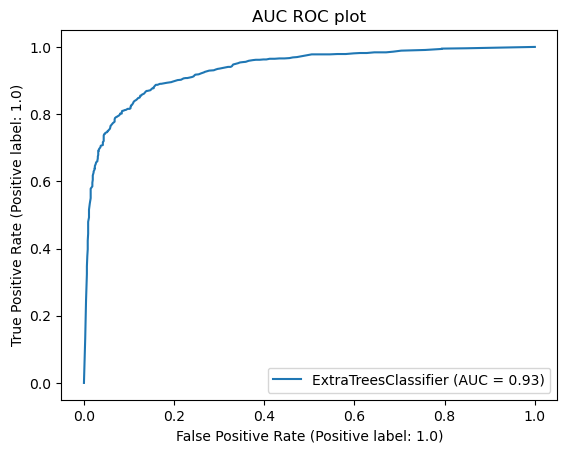

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

OBSERVATION

We got final accuracy score of 86.15% and Cross Validation Score of 84.29% and also AUC score is 0.93 which is really good.

## SAVING MODEL IN PICKLE FORMAT

In [114]:
#pickeling or serialization of a file
import pickle
filename = 'Customer_Churn_Analysis_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

## PREDICTED CONLUSION

In [115]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
2061,1.0,1.0
2062,0.0,0.0
2063,1.0,1.0
2064,1.0,1.0


In [116]:
#Saving the comparison file as a csv file.
df_comparisonc.to_csv('Customer_Churn_Analysis_Prediction.csv')

FINAL OBSERVATION

Best Model for this Problem is found to be "EXTRA TREES CLASSIFIER" with best accuracy of 87.75% on dataset.

.........................................................................................................THANK YOU......................................................................................................

